## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

# 1. 試比較 save_best_only 與否的差異

In [0]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [3]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

SBOList = [True, False]
results1 = {}

# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

for SBO in SBOList:
    model_ckpt = ModelCheckpoint(filepath="./tmp.h5",
                                 monitor="val_loss",
                                 save_best_only=SBOList)

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[model_ckpt])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    # Load back
    model = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    exp_name_tag = str(SBO)
    results1[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                             "loss_loadback": loss_loadback,
                             "acc_loadback": acc_loadback}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

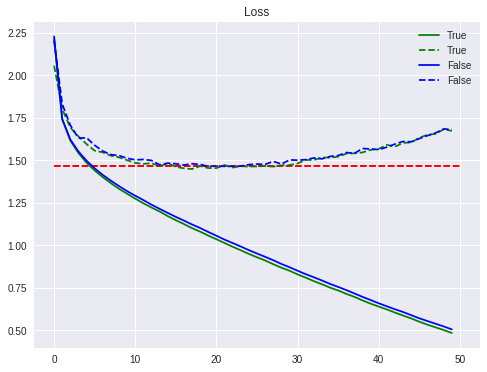

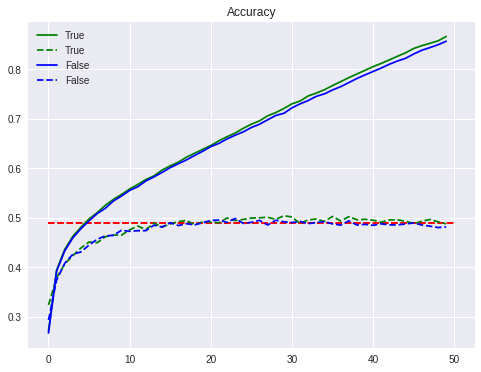

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results1.keys()):
    plt.plot(range(len(results1[cond]['train-loss'])),results1[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results1[cond]['valid-loss'])),results1[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.title("Loss")
#plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results1.keys()):
    plt.plot(range(len(results1[cond]['train-acc'])),results1[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results1[cond]['valid-acc'])),results1[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.title("Accuracy")
plt.legend()
plt.show()

# 2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

Using TensorFlow backend.


170500096/170498071 [==============================] - 7s 0us/step


In [25]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True,
                             save_weights_only = True)

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
__________

In [26]:
model.predict(x_test)

array([[4.72385949e-03, 8.75332451e-04, 3.57280560e-02, ...,
        1.15132889e-05, 5.18452190e-03, 2.38584660e-04],
       [1.12246331e-02, 1.69167668e-01, 9.54937842e-03, ...,
        2.19086651e-03, 4.18080389e-01, 3.62360209e-01],
       [4.91764545e-01, 9.94360149e-02, 2.74559669e-02, ...,
        2.37975572e-03, 3.52583468e-01, 1.34709105e-02],
       ...,
       [5.20957215e-03, 1.23773469e-04, 2.96354771e-01, ...,
        3.90517533e-01, 4.79583941e-05, 2.90450516e-05],
       [1.61607121e-03, 1.00928843e-02, 9.80890095e-02, ...,
        1.58642849e-03, 4.08975000e-04, 3.56373757e-01],
       [1.46655540e-03, 8.10635567e-04, 4.28793905e-03, ...,
        8.35719764e-01, 2.25200609e-04, 8.32132529e-03]], dtype=float32)

In [27]:
# Load back
#model = keras.models.load_weights("./tmp.h5")
model.load_weights("./tmp.h5")
model.predict(x_test)

array([[1.04456153e-02, 1.02973215e-01, 1.36337802e-01, ...,
        6.83250895e-04, 6.29205108e-02, 2.17722869e-03],
       [6.46232674e-03, 6.09137341e-02, 1.65476429e-03, ...,
        1.27271458e-03, 4.96085137e-02, 8.73981416e-01],
       [4.26462829e-01, 2.68562287e-01, 1.40988510e-02, ...,
        5.32752508e-03, 1.59658104e-01, 1.11943766e-01],
       ...,
       [1.01636900e-02, 1.12191751e-03, 4.50113326e-01, ...,
        4.74776253e-02, 1.96687388e-03, 8.89329764e-04],
       [1.47151351e-02, 1.21863801e-02, 4.00771290e-01, ...,
        1.63509212e-02, 5.98016288e-03, 5.51964641e-02],
       [1.08185522e-02, 7.02745793e-03, 2.91413479e-02, ...,
        6.61413193e-01, 2.65149120e-03, 2.78876815e-02]], dtype=float32)